In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.cosmology as cosmo
import astropy.units as u

sun_luminosity = 3.828e33 * u.erg/u.s

#  MACS0416Y1 判明している値
z = 8.312
wavelength = np.array([1.25, 1.40, 1.55, 2.152, 4.5, 850]) * u.um  # micro meter
flux_density = np.array([99e-3, 134e-3, 139e-3, 103e-3, 384e-3, 137]) * u.uJy  # microJy

"""Flux Density Part"""
flux_density = flux_density.to(u.erg / u.s / u.cm**2 / u.Hz)  # Convert to erg/s/cm^2/Hz

"""Wavelength Part"""
wavelength_restframe = wavelength / (1 + z)  # restframe of wavelength
frequency_restframe = (const.c / wavelength_restframe).to(u.Hz)  # Hz

# 宇宙論パラメータの設定
cosmo_params = {'H0': 67.4 * u.km / u.s / u.Mpc, 'Om0': 0.315}
cosmology = cosmo.FlatLambdaCDM(**cosmo_params)
dL = cosmology.luminosity_distance(z).to(u.cm)  # cm

"""Luminosity"""
L = 4 * np.pi * (dL**2) * flux_density  # Convert erg/s/cm^2/Hz to erg/s/Hz
Llambda_restframe = L * frequency_restframe  # Convert erg/s/Hz to erg/s
Llambda_restframe = Llambda_restframe / sun_luminosity # Convert erg/s to erg/(s L_sun)

print(Llambda_restframe)


[5.09315120e+11 6.15514305e+11 5.76692748e+11 3.07791304e+11
 5.48757032e+11 1.03648502e+12]


/tmp/ipykernel_3221652/630251672.py:79: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(wavelength_restframe.value, Llambda_restframe.value,


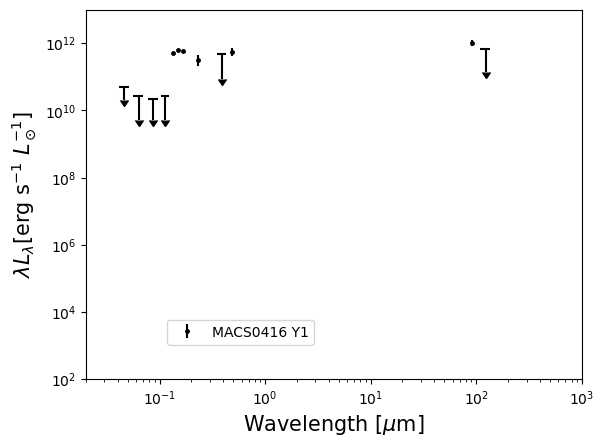

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.cosmology as cosmo
import astropy.units as u

#  MACS0416Y1 判明している値
z = 8.312
wavelength = np.array([1.25, 1.40, 1.55, 2.152, 4.5, 850]) * u.um  # micro meter
flux_density = np.array([99e-3, 134e-3, 139e-3, 103e-3, 384e-3, 137]) * u.uJy  # microJy
flux_density_error_upper = np.array([7e-3, 6e-3, 7e-3, 44e-3, 117e-3, 26])* u.uJy  # microJy
flux_density_error_lower = np.array([6e-3, 6e-3, 6e-3, 31e-3, 90e-3, 26])* u.uJy  # microJy

# JWSTの結果も追加する
# wavelength_JWST = np.array([11556.50115, 14967.00214, 19835.24094, 27553.8901, 35726.98879, 40713.32921, 43860.83538 ]) * u.AA # angstrom
# wavelength_JWST = wavelength_JWST.to(u.um)
# flux_density_JWST = np.array([0.05596631, 0.127565195, 0.155693003, 0.150135539, 0.205890827, 0.170338593, 0.46969339]) * u.uJy # microJy
# flux_density_error_upper_JWST = np.array([0.007313986, 0.008989474, 0.010217222, 0.010216318, 0.012013766, 0.010765438, 0.023987241]) * u.uJy
# flux_density_error_lower_JWST = np.array([0.007313986, 0.008989474, 0.010217222, 0.010216318, 0.012013766, 0.010765438, 0.023987241]) * u.uJy

# wavelength = np.append(wavelength, wavelength_JWST)
# flux_density = np.append(flux_density, flux_density_JWST)
# flux_density_error_upper = np.append(flux_density_error_upper, flux_density_error_upper_JWST)
# flux_density_error_lower = np.append(flux_density_error_lower, flux_density_error_lower_JWST)

# upper limit
wavelength_upperlimit = np.array([0.431, 0.589, 0.811, 1.05, 3.6, 1140]) * u.um  # micro meter
flux_density_upperlimit = np.array([3.40e-3, 2.51e-3, 2.70e-3, 4.25e-3, 270e-3, 116])* u.uJy  # microJy
uplims = np.array([1, 1, 1, 1, 1, 1], dtype=bool)

"""Flux Density Part"""
flux_density = flux_density.to(u.erg / u.s / u.cm**2 / u.Hz)  # Convert to erg/s/cm^2/Hz
flux_density_error_upper = flux_density_error_upper.to(u.erg / u.s / u.cm**2 / u.Hz)  # Convert to erg/s/cm^2/Hz
flux_density_error_lower = flux_density_error_lower.to(u.erg / u.s / u.cm**2 / u.Hz)  # Convert to erg/s/cm^2/Hz
flux_density_upperlimit = flux_density_upperlimit.to(u.erg / u.s / u.cm**2 / u.Hz)  # Convert to erg/s/cm^2/Hz

"""Wavelength Part"""
wavelength_restframe = wavelength / (1 + z)  # restframe of wavelength
frequency_restframe = (const.c / wavelength_restframe).to(u.Hz)  # Hz

# upper limitの波長計算
wavelength_restframe_upperlim = wavelength_upperlimit / (1 + z)  # restframe of wavelength
frequency_restframe_upperlim = (const.c / wavelength_restframe_upperlim).to(u.Hz)  # Hz

# 宇宙論パラメータの設定
cosmo_params = {'H0': 67.4 * u.km / u.s / u.Mpc, 'Om0': 0.315}
cosmology = cosmo.FlatLambdaCDM(**cosmo_params)
dL = cosmology.luminosity_distance(z).to(u.cm)  # cm

"""Luminosity"""
L = 4 * np.pi * (dL**2) * flux_density  # Convert erg/s/cm^2/Hz to erg/s/Hz
Llambda_restframe = L * frequency_restframe  # Convert erg/s/Hz to erg/s
Llambda_restframe = Llambda_restframe / sun_luminosity # Convert erg/s to erg/(s L_sun)

# error bar
L_error_upper = 4 * np.pi * (dL**2) * flux_density_error_upper
Llambda_restframe_upper = L_error_upper * frequency_restframe
Llambda_restframe_upper = Llambda_restframe_upper / sun_luminosity

L_error_lower = 4 * np.pi * (dL**2) * flux_density_error_lower
Llambda_restframe_lower = L_error_lower * frequency_restframe
Llambda_restframe_lower = Llambda_restframe_lower / sun_luminosity

# upper limit
L_upperlimit = 4 * np.pi * (dL**2) * flux_density_upperlimit
Llambda_restframe_uplims = L_upperlimit * frequency_restframe_upperlim
Llambda_restframe_uplims = Llambda_restframe_uplims / sun_luminosity


yerr = np.array([1.2e-14, 1.2e-14, 1.2e-14, 2e-14, 1.3e-12, 5.4e-10])* u.uJy # microJy
yerr = yerr.to(u.erg / u.s / u.cm**2 / u.Hz)  # Convert to erg/s/cm^2/Hz
yerr = 4 * np.pi * (dL**2) * yerr * frequency_restframe_upperlim # Convert to erg/s
yerr = yerr / sun_luminosity

xerr=[0.7e-2,1e-2,1e-2,1e-2,5e-2,22]
xerr=[0.5e-2,0.7e-2,1e-2,1e-2,4e-2,14]

plt.errorbar(wavelength_restframe.value, Llambda_restframe.value, 
             yerr=[Llambda_restframe_lower.value, Llambda_restframe_upper.value], 
             fmt='o', marker='.', linestyle='None', label='MACS0416 Y1', color='black', markersize=5)

plt.errorbar(wavelength_restframe_upperlim.value, Llambda_restframe_uplims.value, 
             xerr=xerr, yerr=yerr.value * 1e11 * 1.7, uplims=uplims, linestyle='None', color='black',
            )


# 軸のスケールとラベル
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength [$\mu$m]', fontsize=15)
plt.ylabel('$\lambda L_\lambda $[erg s$^{-1}$ $L_\odot^{-1}$]', fontsize=15)
plt.legend(bbox_to_anchor=(0.15, 0.18), loc='upper left')
plt.xlim(0.2e-1, 1e3)
plt.ylim(1e2, 1e13)

plt.show()


In [15]:
import pandas as pd

# 波長と λL のデータフレームの作成
data = {
    "Wavelength [um]": wavelength_restframe.value,
    "λL [erg/s/L_sun]": Llambda_restframe.value,
    "λL Upper Error [erg/s/L_sun]": Llambda_restframe_upper.value,
    "λL Lower Error [erg/s/L_sun]": Llambda_restframe_lower.value,
    "Upper Limit": [0] * len(wavelength_restframe)
}

df = pd.DataFrame(data)

# 上限データも追加
upper_limit_data = {
    "Wavelength [um]": wavelength_restframe_upperlim.value,
    "λL [erg/s/L_sun]": Llambda_restframe_uplims.value,
    "λL Upper Error [erg/s/L_sun]": [0] * len(wavelength_restframe_upperlim),
    "λL Lower Error [erg/s/L_sun]": [0] * len(wavelength_restframe_upperlim),
    "Upper Limit": [1] * len(wavelength_restframe_upperlim)
}

df_upper_limits = pd.DataFrame(upper_limit_data)

# 通常のデータと上限データを結合
df_combined = pd.concat([df, df_upper_limits], ignore_index=True)

# 結果を表示
df_combined.sort_values(by="Wavelength [um]", inplace=True)
df_combined.reset_index(drop=True, inplace=True)
output_file_path = 'observation/MACS0416Y1.dat'
df_combined.to_csv(output_file_path, sep='\t', index=False, na_rep='NaN', header=True)

df_combined


,Wavelength [um],λL [erg/s/L_sun],λL Upper Error [erg/s/L_sun],λL Lower Error [erg/s/L_sun],Upper Limit
0,0.046284,5.072979e+10,0.000000e+00,0.000000e+00,1
1,0.063252,2.740437e+10,0.000000e+00,0.000000e+00,1
2,0.087092,2.140939e+10,0.000000e+00,0.000000e+00,1
3,0.112758,2.602921e+10,0.000000e+00,0.000000e+00,1
4,0.134235,5.093151e+11,3.601218e+10,3.086758e+10,0
5,0.150344,6.155143e+11,2.756034e+10,2.756034e+10,0
6,0.166452,5.766927e+11,2.904208e+10,2.489321e+10,0
7,0.231100,3.077913e+11,1.314837e+11,9.263622e+10,0
8,0.386598,4.823060e+11,0.000000e+00,0.000000e+00,1
9,0.483247,5.487570e+11,1.671994e+11,1.286149e+11,0
